# Exploratory Data Analysis for Captsone 2 - Solar Plants Data

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from scipy import stats
from datetime import datetime as dt
import matplotlib.dates as mdates
import calplot

### Import Data Files

In [2]:
# File path locations

solarplants_path = '../Data/solar_plants.csv'
plant1_path = '../Data/plant1.csv'
plant2_path = '../Data/plant2.csv'

In [3]:
# Read file paths into dataframes

sp_df = pd.read_csv(solarplants_path)
p1_df = pd.read_csv(plant1_path)
p2_df = pd.read_csv(plant2_path)

### View Data

In [4]:
sp_df.sample(10)

DATE_TIME  PLANT_ID_x     SOURCE_KEY_x      DC_POWER  \
59413   2020-06-13 13:00:00     4135001  bvBOhCH3iADSZry   9593.250000   
103243  2020-06-02 06:00:00     4136001  WcxssY2VbP4hApt     27.146667   
36841   2020-06-02 18:15:00     4135001  z9Y9gH1T5YWrNuG    309.000000   
49243   2020-06-08 17:30:00     4135001  VHMLBKoKgIrUVDU   1882.625000   
120433  2020-06-10 09:30:00     4136001  xoJJ8DcxJEcupym   1052.466667   
30804   2020-05-30 21:30:00     4135001  wCURE6d3bPkepu2      0.000000   
67304   2020-06-17 07:15:00     4135001  McdE0feGgRqW7Ca   2115.500000   
22291   2020-05-26 11:15:00     4135001  1IF53ai7Xc0U56Y   8276.250000   
36346   2020-06-02 12:45:00     4135001  1BY6WEcLGh8j5v7  10311.375000   
11264   2020-05-20 13:00:00     4135001  wCURE6d3bPkepu2  12154.428570   

           AC_POWER  DAILY_YIELD   TOTAL_YIELD  PLANT_ID_y     SOURCE_KEY_y  \
59413    936.412500  4970.625000  6.514750e+06     4135001  HmiyD2TTLFNqkNe   
103243    26.226667     2.533333  1.818345e+08     4136001  iq8k7ZNt4Mwm3w0   
36841     29.857143  7441.428571  7.147269e+06     4135001  HmiyD2TTLFNqkNe   
49243    184.387500  8400.375000  7.394608e+06     4135001  HmiyD2TTLFNqkNe   
120433  1027.420000  1112.466667  2.092939e+08     4136001  iq8k7ZNt4Mwm3w0   
30804      0.000000  7278.000000  6.903158e+06     4135001  HmiyD2TTLFNqkNe   
67304    207.500000    55.000000  7.402650e+06     4135001  HmiyD2TTLFNqkNe   
22291    809.050000  3491.125000  6.270019e+06     4135001  HmiyD2TTLFNqkNe   
36346   1007.500000  3900.125000  6.387339e+06     4135001  HmiyD2TTLFNqkNe   
11264   1185.471429  5443.000000  6.820792e+06     4135001  HmiyD2TTLFNqkNe   

        AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION    PLANT  
59413             30.007157           52.962486     0.725002  plant_1  
103243            22.916383           22.247265     0.019726  plant_2  
36841             24.565238           23.850462     0.021370  plant_1  
49243             28.517790           31.437490     0.154667  plant_1  
120433            28.454675           39.858438     0.702594  plant_2  
30804             23.541683           21.235256     0.000000  plant_1  
67304             22.711220           25.812589     0.143765  plant_1  
22291             30.313747           55.357068     0.580431  plant_1  
36346             27.777928           47.337703     0.790882  plant_1  
11264             31.393697           56.833254     0.897803  plant_1

In [5]:
sp_df.describe()

PLANT_ID_x       DC_POWER       AC_POWER    DAILY_YIELD  \
count  1.364720e+05  136472.000000  136472.000000  136472.000000   
mean   4.135497e+06    1708.373962     274.790259    3295.366192   
std    4.999863e+02    3222.079306     380.180214    3035.313217   
min    4.135001e+06       0.000000       0.000000       0.000000   
25%    4.135001e+06       0.000000       0.000000      28.285714   
50%    4.135001e+06       5.993333       3.493095    2834.642857   
75%    4.136001e+06    1155.595000     532.568571    5992.000000   
max    4.136001e+06   14471.125000    1410.950000    9873.000000   

        TOTAL_YIELD    PLANT_ID_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
count  1.364720e+05  1.364720e+05        136472.000000       136472.000000   
mean   3.303916e+08  4.135497e+06            26.763066           31.920744   
std    6.085769e+08  4.999863e+02             3.897340           11.803674   
min    0.000000e+00  4.135001e+06            20.398505           18.140415   
25%    6.520020e+06  4.135001e+06            23.637604           22.411698   
50%    7.269333e+06  4.135001e+06            25.908122           26.413755   
75%    2.826096e+08  4.136001e+06            29.266583           40.778583   
max    2.247916e+09  4.136001e+06            39.181638           66.635953   

         IRRADIATION  
count  136472.000000  
mean        0.230767  
std         0.305652  
min         0.000000  
25%         0.000000  
50%         0.026213  
75%         0.442961  
max         1.221652

In [6]:
p1_df.head(), p1_df.tail()

(             DATE_TIME  PLANT_ID_x     SOURCE_KEY_x  DC_POWER  AC_POWER  \
 0  2020-05-15 00:00:00     4135001  1BY6WEcLGh8j5v7       0.0       0.0   
 1  2020-05-15 00:00:00     4135001  1IF53ai7Xc0U56Y       0.0       0.0   
 2  2020-05-15 00:00:00     4135001  3PZuoBAID5Wc2HD       0.0       0.0   
 3  2020-05-15 00:00:00     4135001  7JYdWkrLSPkdwr4       0.0       0.0   
 4  2020-05-15 00:00:00     4135001  McdE0feGgRqW7Ca       0.0       0.0   
 
    DAILY_YIELD  TOTAL_YIELD  PLANT_ID_y     SOURCE_KEY_y  AMBIENT_TEMPERATURE  \
 0          0.0    6259559.0     4135001  HmiyD2TTLFNqkNe            25.184316   
 1          0.0    6183645.0     4135001  HmiyD2TTLFNqkNe            25.184316   
 2          0.0    6987759.0     4135001  HmiyD2TTLFNqkNe            25.184316   
 3          0.0    7602960.0     4135001  HmiyD2TTLFNqkNe            25.184316   
 4          0.0    7158964.0     4135001  HmiyD2TTLFNqkNe            25.184316   
 
    MODULE_TEMPERATURE  IRRADIATION    PLANT  
 

In [7]:
p1_df.describe()

PLANT_ID_x      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD  \
count     68774.0  68774.000000  68774.000000  68774.000000  6.877400e+04   
mean    4135001.0   3147.177450    307.778375   3295.834644  6.978728e+06   
std           0.0   4036.441826    394.394865   3145.220597  4.162707e+05   
min     4135001.0      0.000000      0.000000      0.000000  6.183645e+06   
25%     4135001.0      0.000000      0.000000      0.000000  6.512007e+06   
50%     4135001.0    428.571429     41.450000   2658.473214  7.146685e+06   
75%     4135001.0   6365.468750    623.561161   6274.000000  7.268751e+06   
max     4135001.0  14471.125000   1410.950000   9163.000000  7.846821e+06   

       PLANT_ID_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE   IRRADIATION  
count     68774.0         68774.000000        68774.000000  68774.000000  
mean    4135001.0            25.558521           31.244997      0.232305  
std           0.0             3.361300           12.308283      0.301948  
min     4135001.0            20.398505           18.140415      0.000000  
25%     4135001.0            22.724491           21.123944      0.000000  
50%     4135001.0            24.670178           24.818984      0.031620  
75%     4135001.0            27.960429           41.693659      0.454880  
max     4135001.0            35.252486           65.545714      1.221652

In [8]:
p2_df.head(), p2_df.tail()

(             DATE_TIME  PLANT_ID_x     SOURCE_KEY_x  DC_POWER  AC_POWER  \
 0  2020-05-15 00:00:00     4136001  4UPUqMRk7TRMgml       0.0       0.0   
 1  2020-05-15 00:00:00     4136001  81aHJ1q11NBPMrL       0.0       0.0   
 2  2020-05-15 00:00:00     4136001  9kRcWv60rDACzjR       0.0       0.0   
 3  2020-05-15 00:00:00     4136001  Et9kgGMDl729KT4       0.0       0.0   
 4  2020-05-15 00:00:00     4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   
 
    DAILY_YIELD   TOTAL_YIELD  PLANT_ID_y     SOURCE_KEY_y  \
 0  9425.000000  2.429011e+06     4136001  iq8k7ZNt4Mwm3w0   
 1     0.000000  1.215279e+09     4136001  iq8k7ZNt4Mwm3w0   
 2  3075.333333  2.247720e+09     4136001  iq8k7ZNt4Mwm3w0   
 3   269.933333  1.704250e+06     4136001  iq8k7ZNt4Mwm3w0   
 4  3177.000000  1.994153e+07     4136001  iq8k7ZNt4Mwm3w0   
 
    AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION    PLANT  
 0            27.004764           25.060789          0.0  plant_2  
 1            27.004764         

In [9]:
p2_df.describe()

PLANT_ID_x      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD  \
count     67698.0  67698.000000  67698.000000  67698.000000  6.769800e+04   
mean    4136001.0    246.701961    241.277825   3294.890295  6.589448e+08   
std           0.0    370.569597    362.112118   2919.448386  7.296678e+08   
min     4136001.0      0.000000      0.000000      0.000000  0.000000e+00   
25%     4136001.0      0.000000      0.000000    272.750000  1.996494e+07   
50%     4136001.0      0.000000      0.000000   2911.000000  2.826276e+08   
75%     4136001.0    446.591667    438.215000   5534.000000  1.348495e+09   
max     4136001.0   1420.933333   1385.420000   9873.000000  2.247916e+09   

       PLANT_ID_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE   IRRADIATION  
count     67698.0         67698.000000        67698.000000  67698.000000  
mean    4136001.0            27.986756           32.607233      0.229204  
std           0.0             4.021294           11.226446      0.309365  
min     4136001.0            20.942385           20.265123      0.000000  
25%     4136001.0            24.570349           23.685627      0.000000  
50%     4136001.0            26.910352           27.433723      0.018554  
75%     4136001.0            30.912601           40.019036      0.431027  
max     4136001.0            39.181638           66.635953      1.098766

In [10]:
# Create Datetime intervals
'''
sp_df['TIME'] = pd.to_datetime(sp_df['DATE_TIME']).dt.time
sp_df['DATE'] = pd.to_datetime(sp_df['DATE_TIME']).dt.date

p1_df['TIME'] = pd.to_datetime(p1_df['DATE_TIME']).dt.time
p1_df['DATE'] = pd.to_datetime(p1_df['DATE_TIME']).dt.date

p2_df['TIME'] = pd.to_datetime(p2_df['DATE_TIME']).dt.time
p2_df['DATE'] = pd.to_datetime(p2_df['DATE_TIME']).dt.date
'''

"\nsp_df['TIME'] = pd.to_datetime(sp_df['DATE_TIME']).dt.time\nsp_df['DATE'] = pd.to_datetime(sp_df['DATE_TIME']).dt.date\n\np1_df['TIME'] = pd.to_datetime(p1_df['DATE_TIME']).dt.time\np1_df['DATE'] = pd.to_datetime(p1_df['DATE_TIME']).dt.date\n\np2_df['TIME'] = pd.to_datetime(p2_df['DATE_TIME']).dt.time\np2_df['DATE'] = pd.to_datetime(p2_df['DATE_TIME']).dt.date\n"

### Exploratory Visualizations

<AxesSubplot:xlabel='TIME'>

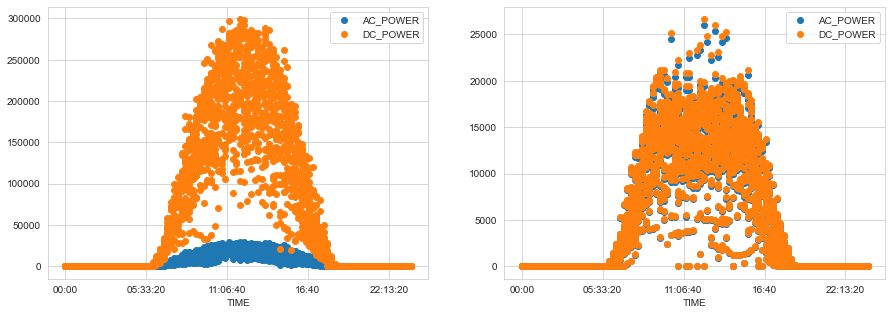

In [11]:
# Daily AC and DC Power Plots for Plant1 and Plant2

fig,ax = plt.subplots(1, 2, figsize=(15,5))

p1_test = p1_df.groupby('DATE_TIME').sum().reset_index()
p1_test['TIME']= pd.to_datetime(p1_test['DATE_TIME']).dt.time

p1_test.set_index('TIME')[['AC_POWER', 'DC_POWER']].plot(style='o', ax=ax[0])

p2_test = p2_df.groupby('DATE_TIME').sum().reset_index()
p2_test['TIME']= pd.to_datetime(p2_test['DATE_TIME']).dt.time

p2_test.set_index('TIME')[['AC_POWER', 'DC_POWER']].plot(style='o', ax=ax[1])

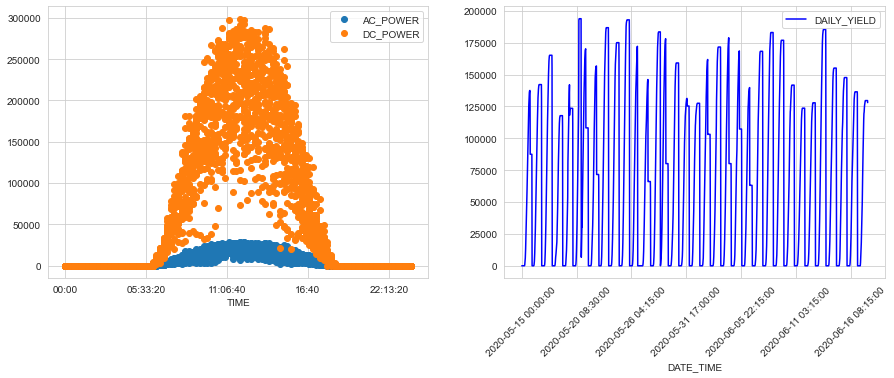

In [12]:


fig,ax = plt.subplots(1, 2, figsize=(15,5))

p1_test = p1_df.groupby('DATE_TIME').sum().reset_index()
p1_test['TIME']= pd.to_datetime(p1_test['DATE_TIME']).dt.time

p1_test.set_index('TIME')[['AC_POWER', 'DC_POWER']].plot(style='o', ax=ax[0])

p1_test.plot(x='DATE_TIME', y='DAILY_YIELD', c='b', ax=ax[1])


ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.show()

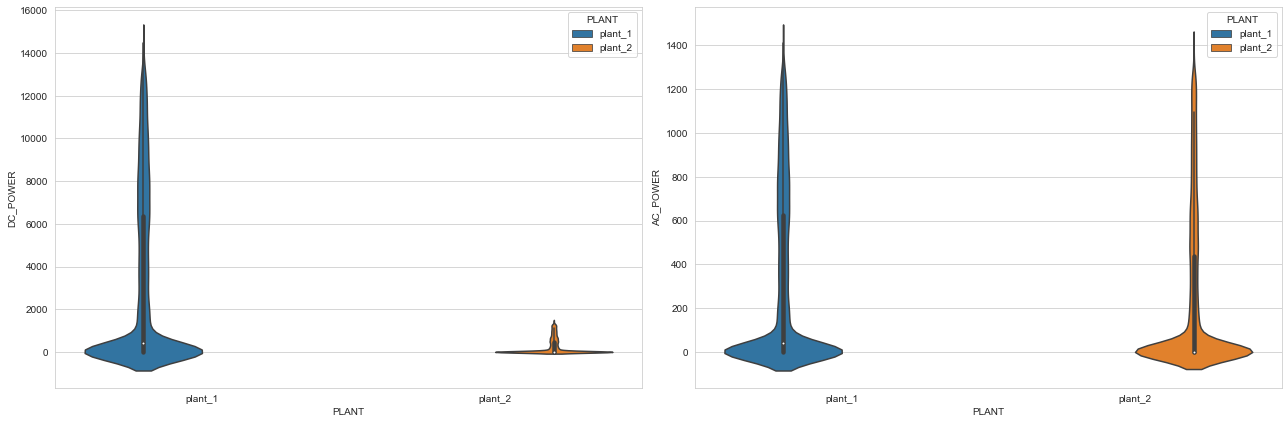

In [13]:

fig,ax = plt.subplots(1, 2, figsize=(18, 6))

sns.violinplot(data=sp_df, x='PLANT', y='DC_POWER', hue='PLANT', scale='count', ax=ax[0])
sns.violinplot(data=sp_df, x='PLANT', y='AC_POWER', hue='PLANT', scale='count', ax=ax[1])

fig.tight_layout()
plt.show()

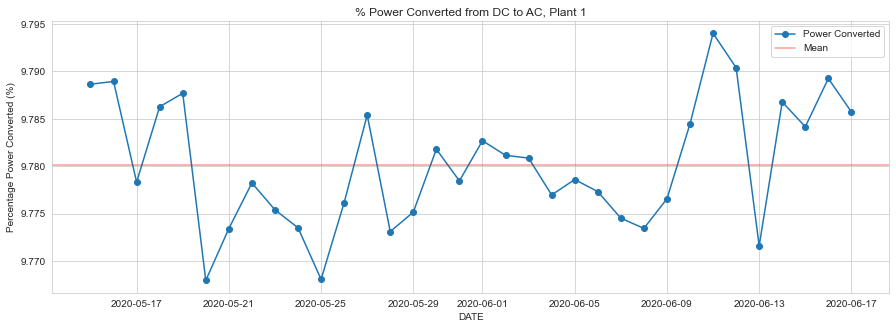

In [14]:


plt.figure(figsize=(15,5))

conv1 = p1_df.copy()
conv1['DATE'] = pd.to_datetime(conv1['DATE_TIME']).dt.date
conv1 = conv1.groupby('DATE').sum()
conv1['CONV_POWER'] = conv1['AC_POWER']/conv1['DC_POWER']*100

conv1['CONV_POWER'].plot(style = 'o-',label = 'Power Converted')

plt.axhline(conv1['CONV_POWER'].mean(), linestyle='-', color='r', alpha=0.4, label='Mean')

plt.title('% Power Converted from DC to AC, Plant 1')
plt.ylabel('Percentage Power Converted (%)')
plt.legend()
plt.show()

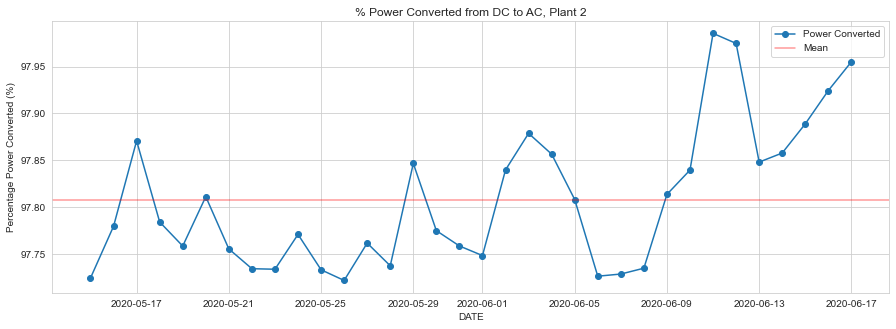

In [15]:

plt.figure(figsize=(15,5))

conv2 = p2_df.copy()
conv2['DATE'] = pd.to_datetime(conv2['DATE_TIME']).dt.date
conv2 = conv2.groupby('DATE').sum()
conv2['CONV_POWER'] = conv2['AC_POWER']/conv2['DC_POWER']*100

conv2['CONV_POWER'].plot(style='o-',label='Power Converted')

plt.axhline(conv2['CONV_POWER'].mean(), linestyle='-', color='r', alpha=0.4, label='Mean')

plt.title('% Power Converted from DC to AC, Plant 2')
plt.ylabel('Percentage Power Converted (%)')
plt.legend()
plt.show()

In [16]:
# Adjust DC_POWER column for Plant 2 in sp_df and p2_df

sp_df.loc[sp_df.PLANT == 'plant_2', 'DC_POWER'] = sp_df.loc[sp_df.PLANT == 'plant_2','DC_POWER']*10

p2_df['DC_POWER_s'] = p2_df['DC_POWER'] * 10

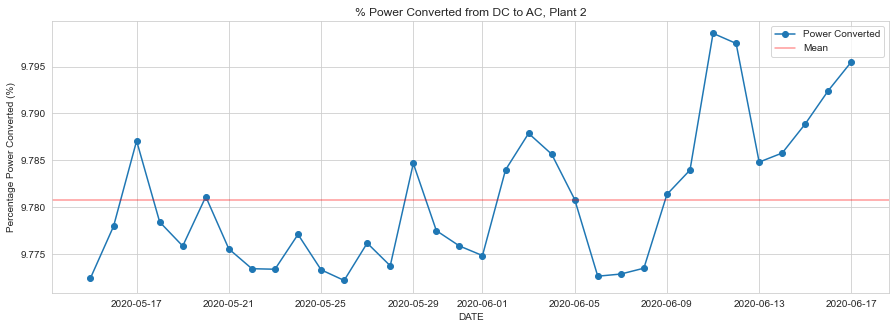

In [17]:

plt.figure(figsize=(15,5))

conv2 = p2_df.copy()
conv2['DATE'] = pd.to_datetime(conv2['DATE_TIME']).dt.date
conv2 = conv2.groupby('DATE').sum()
conv2['CONV_POWER'] = conv2['AC_POWER']/conv2['DC_POWER_s']*100

conv2['CONV_POWER'].plot(style='o-',label='Power Converted')

plt.axhline(conv2['CONV_POWER'].mean(), linestyle='-', color='r', alpha=0.4, label='Mean')

plt.title('% Power Converted from DC to AC, Plant 2')
plt.ylabel('Percentage Power Converted (%)')
plt.legend()
plt.show()

<AxesSubplot:xlabel='TIME'>

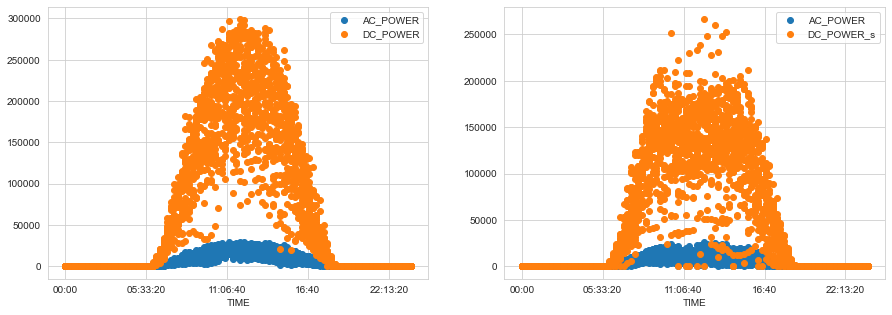

In [18]:
fig,ax = plt.subplots(1, 2, figsize=(15,5))

p1_test = p1_df.groupby('DATE_TIME').sum().reset_index()
p1_test['TIME']= pd.to_datetime(p1_test['DATE_TIME']).dt.time

p1_test.set_index('TIME')[['AC_POWER', 'DC_POWER']].plot(style='o', ax=ax[0])

p2_test = p2_df.groupby('DATE_TIME').sum().reset_index()
p2_test['TIME']= pd.to_datetime(p2_test['DATE_TIME']).dt.time

p2_test.set_index('TIME')[['AC_POWER', 'DC_POWER_s']].plot(style='o', ax=ax[1])

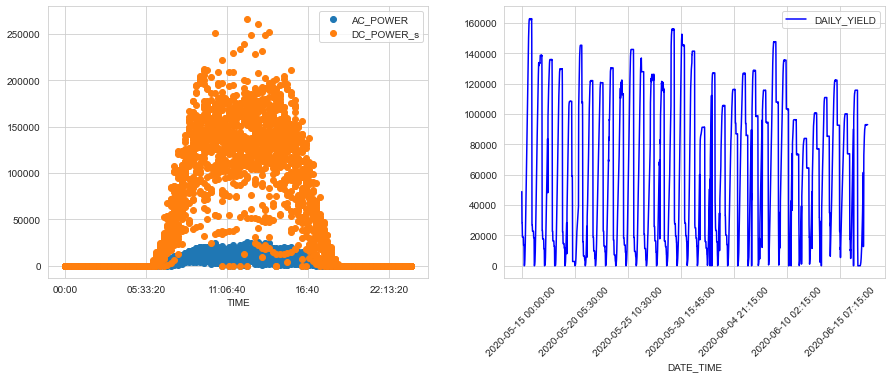

In [19]:
fig,ax = plt.subplots(1, 2, figsize=(15,5))

p2_test = p2_df.groupby('DATE_TIME').sum().reset_index()
p2_test['TIME']= pd.to_datetime(p2_test['DATE_TIME']).dt.time

p2_test.set_index('TIME')[['AC_POWER', 'DC_POWER_s']].plot(style='o', ax=ax[0])

p2_test.plot(x='DATE_TIME', y='DAILY_YIELD', c='b', ax=ax[1])

ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.show()

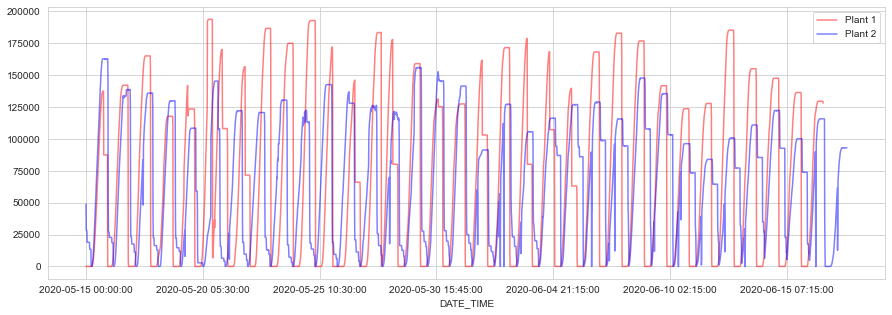

In [20]:
fig,ax = plt.subplots(figsize=(15,5))

p1_test.plot(x='DATE_TIME', y='DAILY_YIELD', c='r', alpha=0.5, label='Plant 1', ax=ax)
p2_test.plot(x='DATE_TIME', y='DAILY_YIELD', c='b', alpha=0.5, label='Plant 2', ax=ax)

plt.legend()
plt.show()

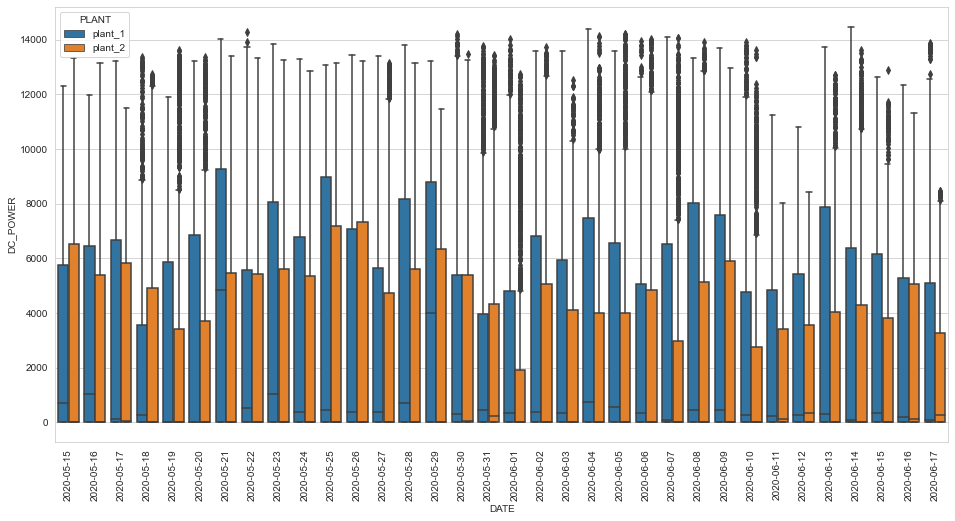

In [21]:

fig, ax = plt.subplots(figsize=(16,8))

sp_df['TIME'] = pd.to_datetime(sp_df['DATE_TIME']).dt.time
sp_df['DATE'] = pd.to_datetime(sp_df['DATE_TIME']).dt.date

sns.boxplot(x='DATE', y='DC_POWER', hue='PLANT', data=sp_df, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

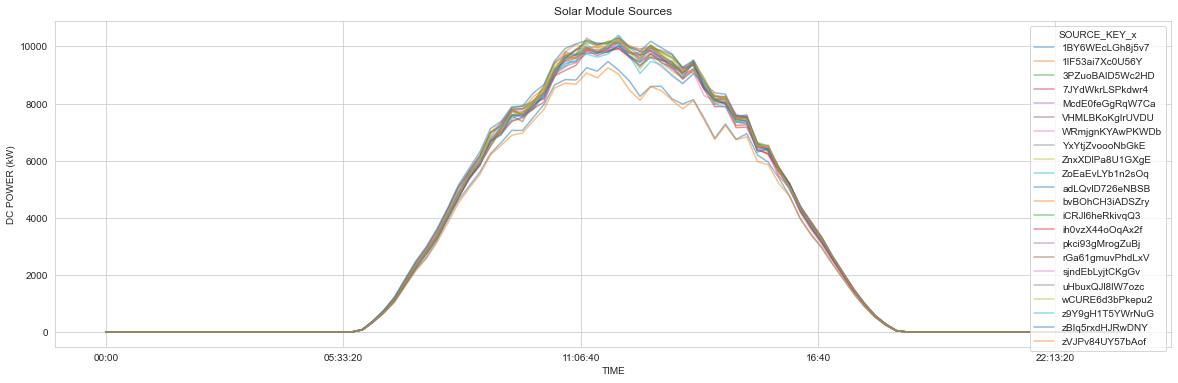

In [22]:
p1_srcs=p1_df.copy()
p1_srcs['TIME'] = pd.to_datetime(p1_srcs['DATE_TIME']).dt.time
p1_srcs = p1_srcs.groupby(['TIME','SOURCE_KEY_x'])['DC_POWER'].mean().unstack()

p1_srcs.plot(figsize=(20,6), alpha=0.5)

plt.title('Solar Module Sources')
plt.ylabel('DC POWER (kW)')
plt.show()

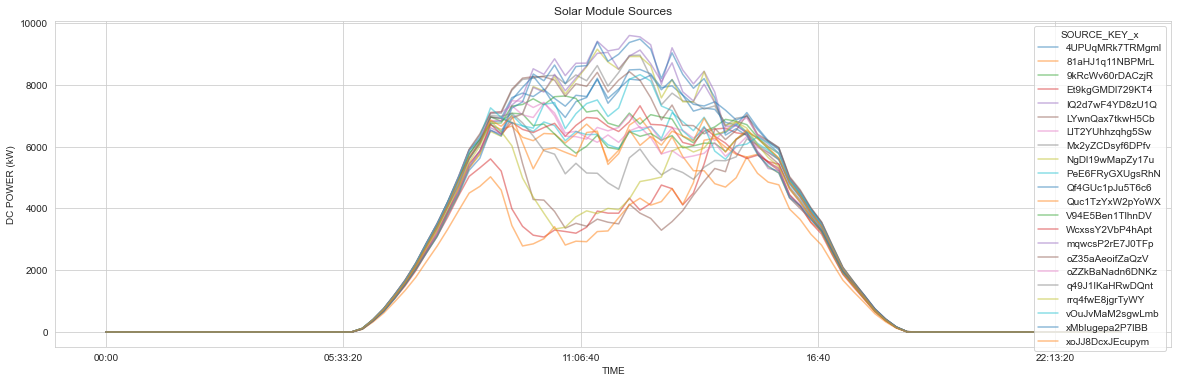

In [23]:
p2_srcs=p2_df.copy()
p2_srcs['TIME'] = pd.to_datetime(p2_srcs['DATE_TIME']).dt.time
p2_srcs = p2_srcs.groupby(['TIME','SOURCE_KEY_x'])['DC_POWER_s'].mean().unstack()

p2_srcs.plot(figsize=(20,6), alpha=0.5)

plt.title('Solar Module Sources')
plt.ylabel('DC POWER (kW)')
plt.show()

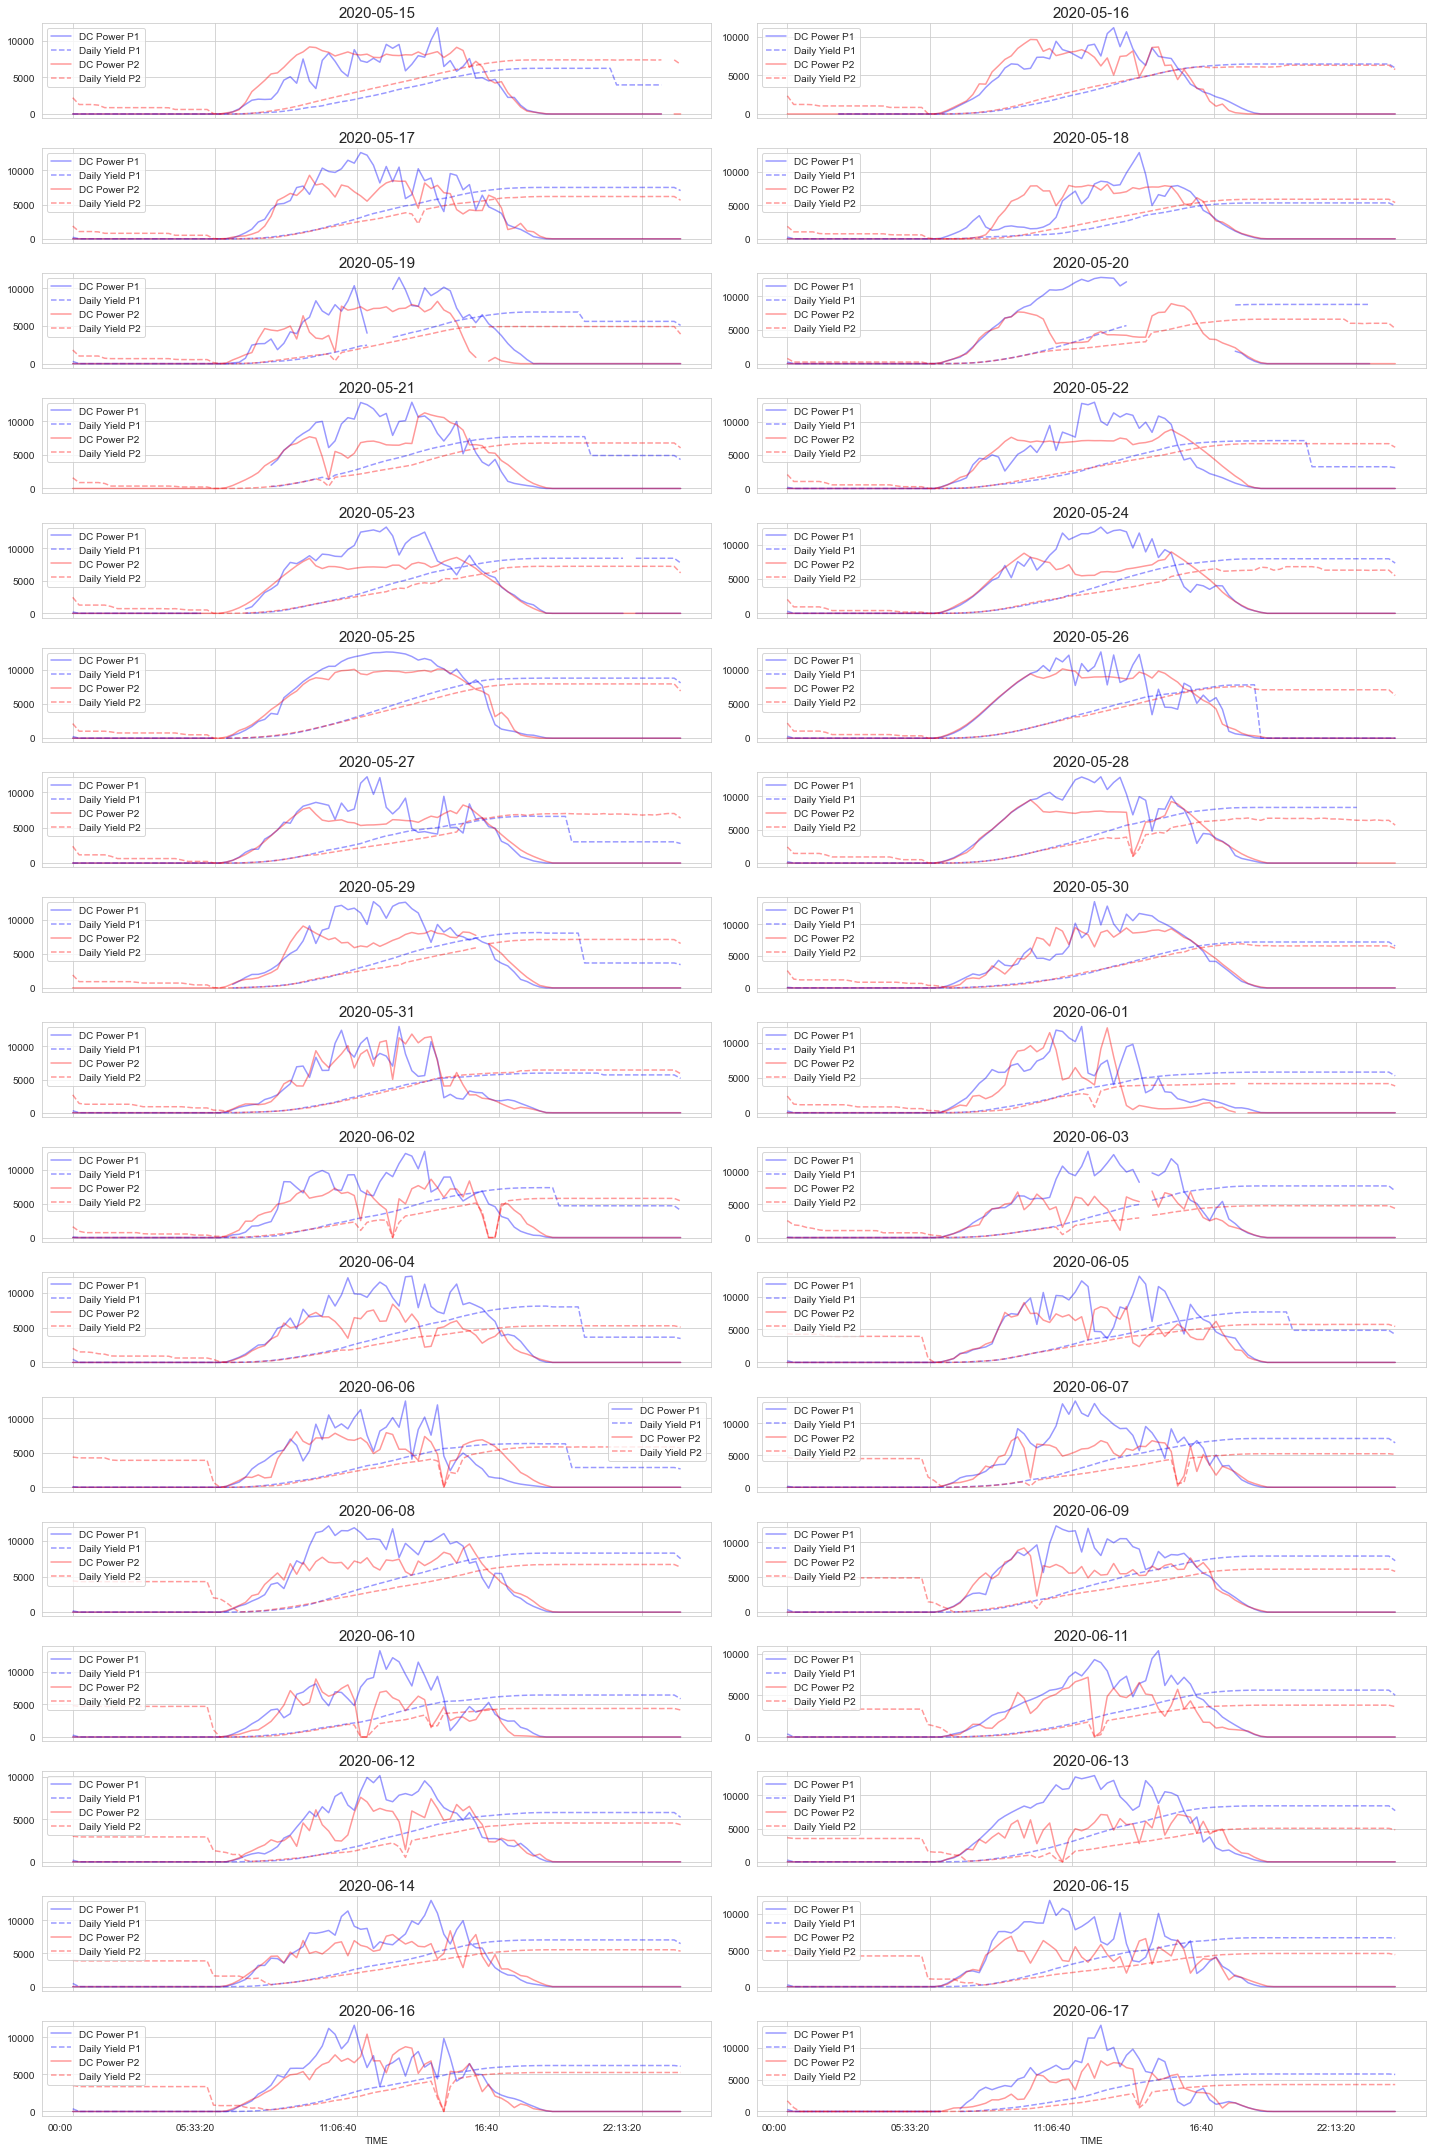

In [24]:

p1_df['TIME'] = pd.to_datetime(p1_df['DATE_TIME']).dt.time
p1_df['DATE'] = pd.to_datetime(p1_df['DATE_TIME']).dt.date
p2_df['TIME'] = pd.to_datetime(p2_df['DATE_TIME']).dt.time
p2_df['DATE'] = pd.to_datetime(p2_df['DATE_TIME']).dt.date
c1 = p1_df.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack()
c2 = p2_df.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack()

ax = p1_df.groupby(['TIME','DATE'])['DC_POWER'].mean().unstack().plot(color='b', alpha=0.4, sharex=True,subplots=True,layout=(17,2),figsize=(20,30))
p1_df.groupby(['TIME','DATE'])['DAILY_YIELD'].mean().unstack().plot(color='b', alpha=0.4,subplots=True,figsize=(20,20),style='--',ax=ax)

p2_df.groupby(['TIME','DATE'])['DC_POWER_s'].mean().unstack().plot(color='r', alpha=0.4,subplots=True,figsize=(20,30),ax=ax)
p2_df.groupby(['TIME','DATE'])['DAILY_YIELD'].mean().unstack().plot(color='r', alpha=0.4,subplots=True,figsize=(20,20),style='--',ax=ax)



i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(c1.columns[i],size=15)
        ax[a,b].legend(['DC Power P1','Daily Yield P1','DC Power P2','Daily Yield P2'])
        i=i+1

plt.tight_layout()
plt.show()


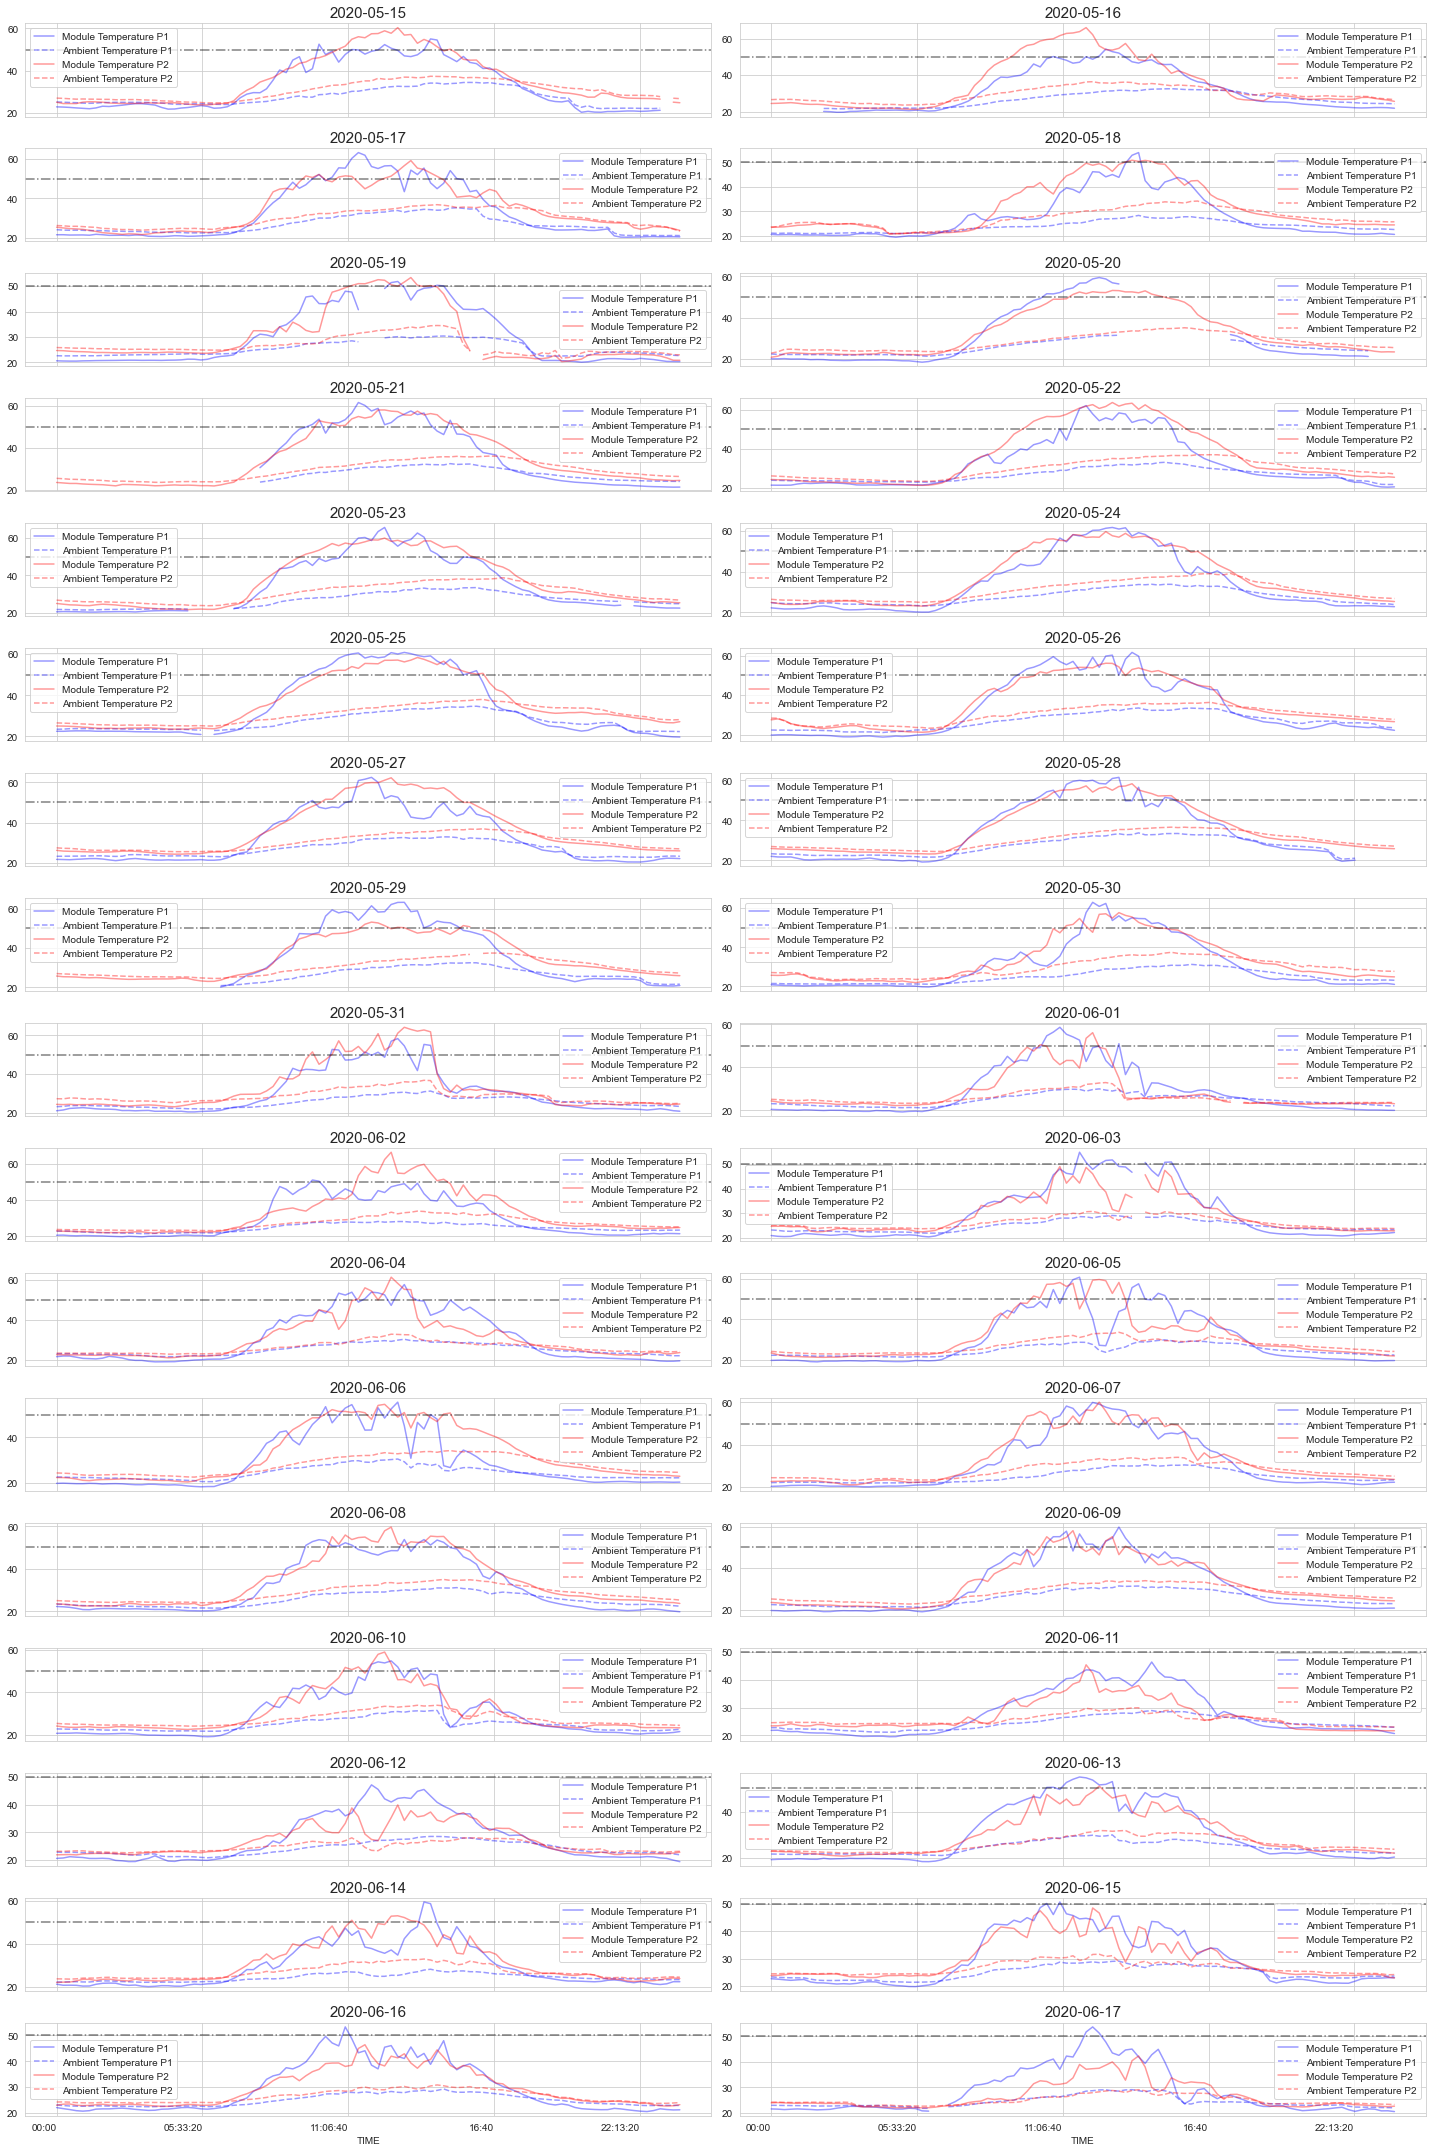

In [25]:

p1_df['TIME'] = pd.to_datetime(p1_df['DATE_TIME']).dt.time
p1_df['DATE'] = pd.to_datetime(p1_df['DATE_TIME']).dt.date
p2_df['TIME'] = pd.to_datetime(p2_df['DATE_TIME']).dt.time
p2_df['DATE'] = pd.to_datetime(p2_df['DATE_TIME']).dt.date
c1 = p1_df.groupby(['TIME','DATE'])['MODULE_TEMPERATURE'].mean().unstack()
#c2 = p2_df.groupby(['TIME','DATE'])['MODULE_TEMPERATURE'].mean().unstack()

ax = p1_df.groupby(['TIME','DATE'])['MODULE_TEMPERATURE'].mean().unstack().plot(color='b', alpha=0.4, sharex=True,subplots=True, layout=(17,2),figsize=(20,30))
p1_df.groupby(['TIME','DATE'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(color='b', alpha=0.4, subplots=True,figsize=(20,20),style='--',ax=ax)

p2_df.groupby(['TIME','DATE'])['MODULE_TEMPERATURE'].mean().unstack().plot(color='r', alpha=0.4,subplots=True,figsize=(20,30), ax=ax)
p2_df.groupby(['TIME','DATE'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(color='r', alpha=0.4,subplots=True,figsize=(20,20),style='--',ax=ax)



i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(50, color='k',linestyle='-.', alpha=0.5)
        ax[a,b].set_title(c1.columns[i],size=15)
        ax[a,b].legend(['Module Temperature P1','Ambient Temperature P1','Module Temperature P2','Ambient Temperature P2'])
        i=i+1

plt.tight_layout()
plt.show()


In [26]:

p1corr = p1_df.drop(['PLANT_ID_x', 'PLANT_ID_y'], axis=1)

p1c = p1corr.corr(method='spearman')
p1c

DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
DC_POWER             1.000000  1.000000     0.218737    -0.000856   
AC_POWER             1.000000  1.000000     0.218727    -0.000856   
DAILY_YIELD          0.218737  0.218727     1.000000     0.012204   
TOTAL_YIELD         -0.000856 -0.000856     0.012204     1.000000   
AMBIENT_TEMPERATURE  0.744799  0.744774     0.553952    -0.054635   
MODULE_TEMPERATURE   0.899641  0.899628     0.394401    -0.028260   
IRRADIATION          0.987896  0.987893     0.217696    -0.007210   

                     AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
DC_POWER                        0.744799            0.899641     0.987896  
AC_POWER                        0.744774            0.899628     0.987893  
DAILY_YIELD                     0.553952            0.394401     0.217696  
TOTAL_YIELD                    -0.054635           -0.028260    -0.007210  
AMBIENT_TEMPERATURE             1.000000            0.910235     0.747060  
MODULE_TEMPERATURE              0.910235            1.000000     0.901496  
IRRADIATION                     0.747060            0.901496     1.000000

In [27]:
p2corr = p2_df.drop(['PLANT_ID_x', 'PLANT_ID_y','DC_POWER'], axis=1)

p2c = p2corr.corr(method='spearman')
p2c

AC_POWER  DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  \
AC_POWER             1.000000     0.048951     0.006098             0.546910   
DAILY_YIELD          0.048951     1.000000    -0.066776             0.344313   
TOTAL_YIELD          0.006098    -0.066776     1.000000            -0.021525   
AMBIENT_TEMPERATURE  0.546910     0.344313    -0.021525             1.000000   
MODULE_TEMPERATURE   0.703575     0.181923    -0.019491             0.917311   
IRRADIATION          0.810575    -0.037260    -0.014930             0.666816   
DC_POWER_s           1.000000     0.048951     0.006092             0.546913   

                     MODULE_TEMPERATURE  IRRADIATION  DC_POWER_s  
AC_POWER                       0.703575     0.810575    1.000000  
DAILY_YIELD                    0.181923    -0.037260    0.048951  
TOTAL_YIELD                   -0.019491    -0.014930    0.006092  
AMBIENT_TEMPERATURE            0.917311     0.666816    0.546913  
MODULE_TEMPERATURE             1.000000     0.858128    0.703582  
IRRADIATION                    0.858128     1.000000    0.810586  
DC_POWER_s                     0.703582     0.810586    1.000000

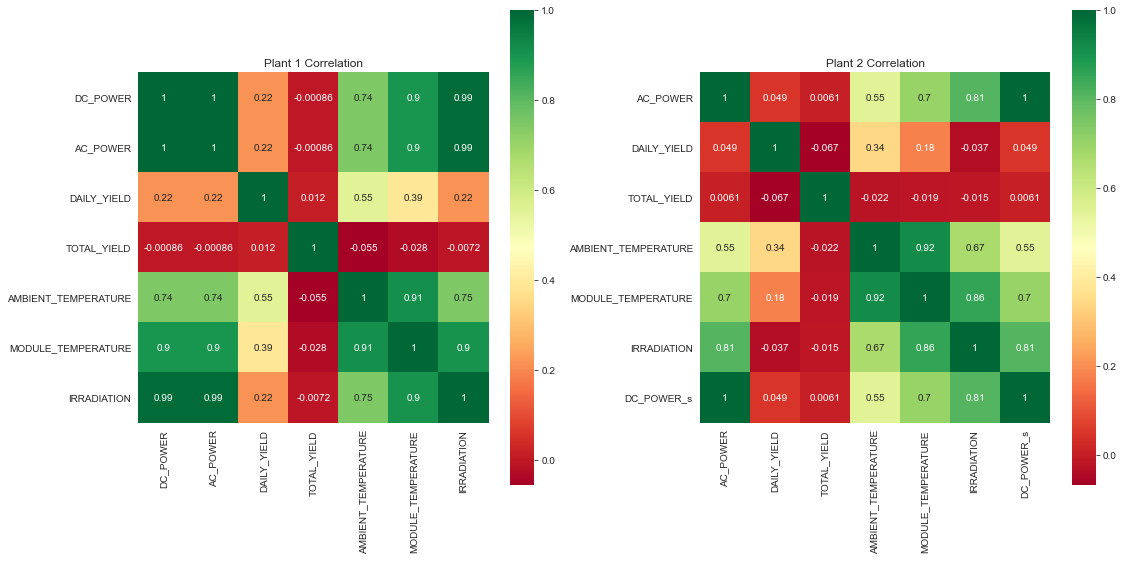

In [28]:

fig, ax = plt.subplots(1, 2, figsize=(16,8))
sns.heatmap(p1c, cmap='RdYlGn', annot=True, square=True, ax=ax[0])
sns.heatmap(p2c, cmap='RdYlGn', annot=True, square=True, ax=ax[1])

ax[0].set_title('Plant 1 Correlation')
ax[1].set_title('Plant 2 Correlation')

plt.tight_layout()
plt.show()

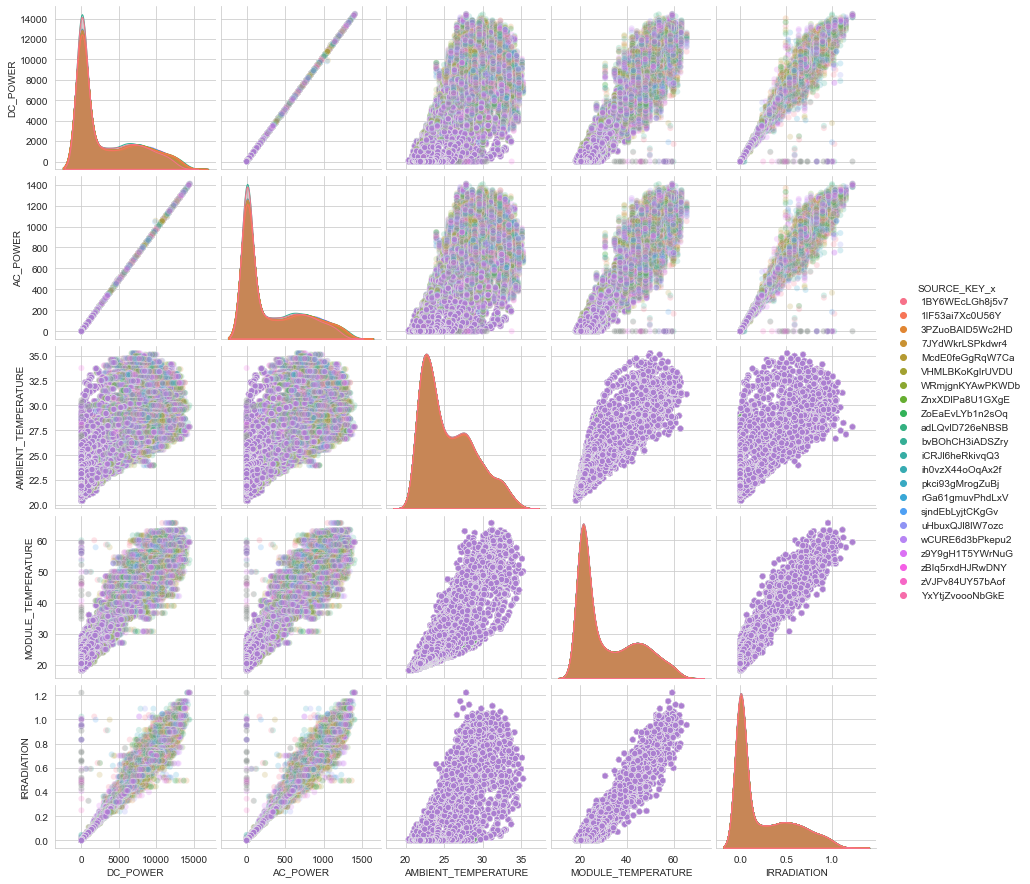

In [29]:
# Create pairplots for each plant

p1_hm = p1_df.copy()
#p1_hm['TIME'] = pd.to_datetime(p1_hm['DATE_TIME']).dt.time
cols = ['DATE_TIME', 'SOURCE_KEY_x', 'DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
p1_hm = p1_df[cols]
p1_hm.set_index('DATE_TIME')


sns.pairplot(p1_hm, hue='SOURCE_KEY_x',kind='scatter', plot_kws={'alpha':0.2})


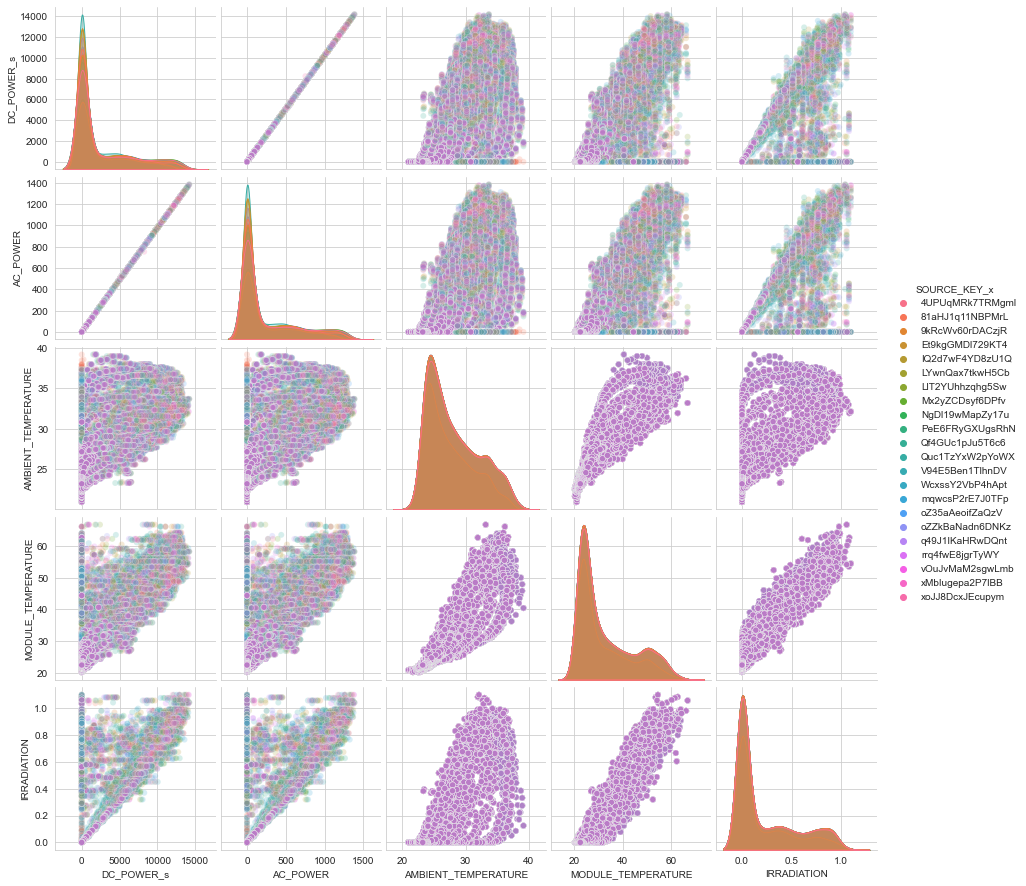

In [30]:
p2_hm = p2_df.copy()
#p1_hm['TIME'] = pd.to_datetime(p1_hm['DATE_TIME']).dt.time
cols = ['DATE_TIME', 'SOURCE_KEY_x', 'DC_POWER_s', 'AC_POWER', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
p2_hm = p2_df[cols]
p2_hm.set_index('DATE_TIME')


sns.pairplot(p2_hm, hue='SOURCE_KEY_x', kind='scatter', plot_kws={'alpha':0.2})

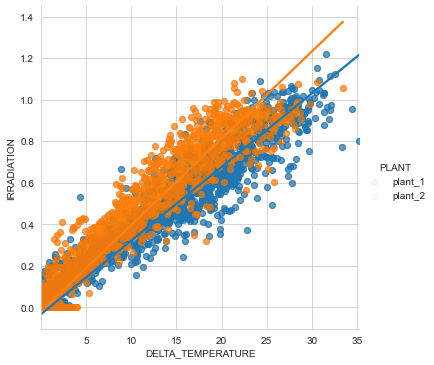

In [31]:
# Delta Temperature column

sp_df['DELTA_TEMPERATURE'] = abs(sp_df['AMBIENT_TEMPERATURE'] - sp_df['MODULE_TEMPERATURE'])

sns.lmplot(x='DELTA_TEMPERATURE', y='IRRADIATION', hue='PLANT', data=sp_df, scatter_kws={'alpha':0.05})

plt.show()

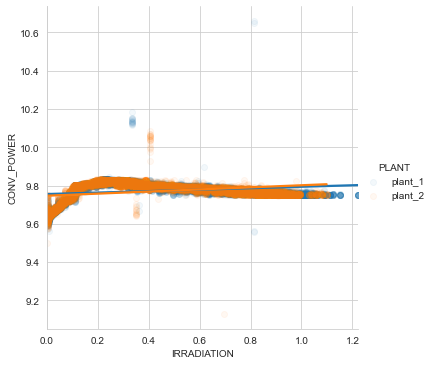

In [32]:
sp_df['CONV_POWER'] = sp_df['AC_POWER']/sp_df['DC_POWER']*100

sns.lmplot(x='IRRADIATION', y='CONV_POWER', hue='PLANT', data=sp_df, scatter_kws={'alpha':0.05})

plt.show()

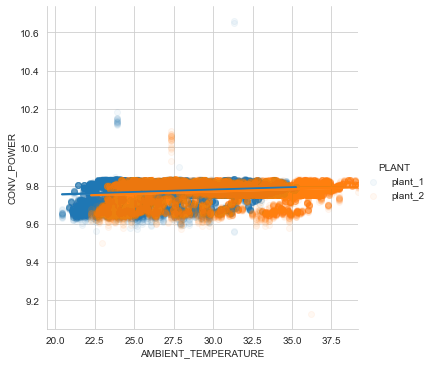

In [35]:
sns.lmplot(x='AMBIENT_TEMPERATURE', y='CONV_POWER', hue='PLANT', data=sp_df, scatter_kws={'alpha':0.05})

plt.show()